<Axes: xlabel='decimal_date', ylabel='average'>

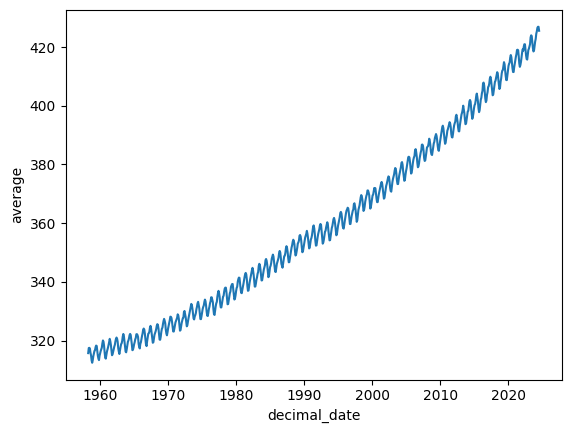

In [2]:
import pandas as pd 
import seaborn as sns
columns = ['year', 'month', 'decimal_date', 'average', 'smooth', 'std_days', 'uncertainty_monthly_mean', 'empty']
df = pd.read_csv("https://gml.noaa.gov/webdata/ccgg/trends/co2/co2_mm_mlo.txt", sep="\s+", comment="#", names= columns)
df.to_csv("data.csv") # pandas_ai isn't good at guessing parsing

# manual
sns.lineplot(df, x = "decimal_date", y="average")

In [4]:
from pandasai import SmartDataframe # requires 1.x numpy
from pandasai.llm import OpenAI

In [5]:
import streamlit as st
llm = OpenAI(api_token=st.secrets["OPENAI_API_KEY"])
pandas_ai = SmartDataframe("data.csv", 
              config={
                      "llm": llm, 
                      "save_charts": False,
                      "verbose": False
                      }
            )

In [6]:
llm.model

'gpt-4o-mini'

'/home/rstudio/cboettig/pandasai/exports/charts/temp_chart.png'

Error: no "view" rule for type "image/png" passed its test case
       (for more information, add "--debug=1" on the command line)


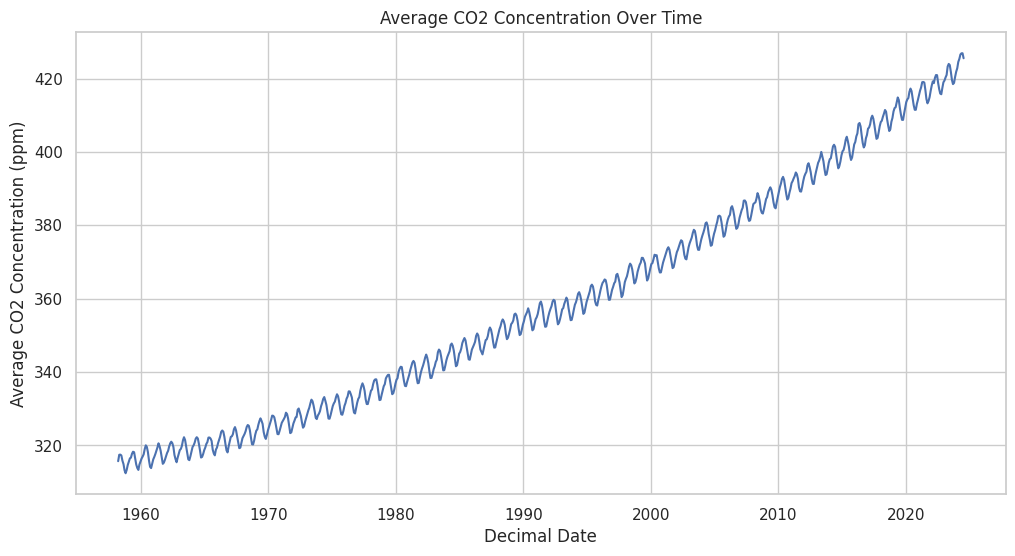

In [10]:
pandas_ai.chat("Plot the average CO2 concentration over time (decimal_date) using seaborn lineplot (no point markers)")

In [11]:
print(pandas_ai.last_code_generated)

df = dfs[0]
sns.set(style='whitegrid')
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='decimal_date', y='average', marker=None)
plt.title('Average CO2 Concentration Over Time')
plt.xlabel('Decimal Date')
plt.ylabel('Average CO2 Concentration (ppm)')
plt.savefig('/home/rstudio/cboettig/pandasai/exports/charts/temp_chart.png')
result = {'type': 'plot', 'value': '/home/rstudio/cboettig/pandasai/exports/charts/temp_chart.png'}


In [12]:
pandas_ai.chat("add a column reformatting decimal_date as a datetime type")

,Unnamed: 0,year,month,decimal_date,average,smooth,std_days,uncertainty_monthly_mean,empty,date
0,0,1958,3,1958.2027,315.71,314.44,-1,-9.99,-0.99,1958-03-01
1,1,1958,4,1958.2877,317.45,315.16,-1,-9.99,-0.99,1958-04-01
2,2,1958,5,1958.3699,317.51,314.69,-1,-9.99,-0.99,1958-05-01
3,3,1958,6,1958.4548,317.27,315.15,-1,-9.99,-0.99,1958-06-01
4,4,1958,7,1958.5370,315.87,315.20,-1,-9.99,-0.99,1958-07-01
...,...,...,...,...,...,...,...,...,...,...
792,792,2024,3,2024.2083,425.38,423.92,22,0.99,0.40,2024-03-01
793,793,2024,4,2024.2917,426.57,424.03,24,0.98,0.38,2024-04-01
794,794,2024,5,2024.3750,426.90,423.61,29,0.76,0.27,2024-05-01
795,795,2024,6,2024.4583,426.91,424.44,20,0.65,0.28,2024-06-01


In [13]:
print(pandas_ai.last_code_generated)

for df in dfs:
    df['date'] = pd.to_datetime(df['decimal_date'].astype(str) + '-01-01')
result = {'type': 'dataframe', 'value': dfs[0]}


In [14]:
pandas_ai.chat("What scientific conclusion can you draw from the previous plot?")

Traceback (most recent call last):
  File "/home/rstudio/.venv/lib/python3.10/site-packages/pandasai/pipelines/chat/generate_chat_pipeline.py", line 335, in run
    ).run(input)
  File "/home/rstudio/.venv/lib/python3.10/site-packages/pandasai/pipelines/pipeline.py", line 137, in run
    raise e
  File "/home/rstudio/.venv/lib/python3.10/site-packages/pandasai/pipelines/pipeline.py", line 101, in run
    step_output = logic.execute(
  File "/home/rstudio/.venv/lib/python3.10/site-packages/pandasai/pipelines/chat/code_execution.py", line 113, in execute
    raise e
  File "/home/rstudio/.venv/lib/python3.10/site-packages/pandasai/pipelines/chat/code_execution.py", line 85, in execute
    result = self.execute_code(code_to_run, code_context)
  File "/home/rstudio/.venv/lib/python3.10/site-packages/pandasai/pipelines/chat/code_execution.py", line 175, in execute_code
    raise NoResultFoundError("No result returned")
pandasai.exceptions.NoResultFoundError: No result returned


'Unfortunately, I was not able to answer your question, because of the following error:\n\nNo result returned\n'

'/home/rstudio/cboettig/pandasai/exports/charts/temp_chart.png'

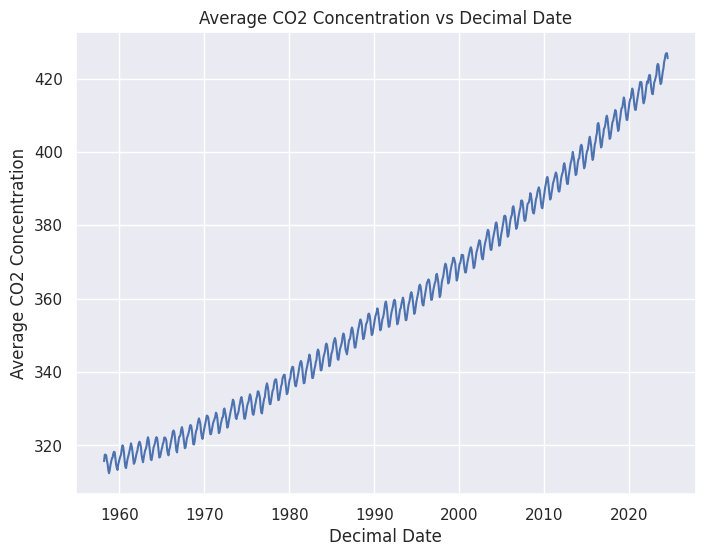

In [15]:
from pandasai import SmartDataframe
from pandasai.llm.local_llm import LocalLLM

ollama_llm = LocalLLM(api_base="http://localhost:11434/v1", model="llama3.1:8b")
df = SmartDataframe("data.csv", config={"llm": ollama_llm})

df.chat("Plot the average CO2 concentration vs decimal_date using seaborn")

In [16]:
print(df.last_code_generated)

result = {}
for df in dfs:
    sns.set()
    plt.figure(figsize=(8, 6))
    sns.lineplot(x='decimal_date', y='average', data=df)
    plt.title('Average CO2 Concentration vs Decimal Date')
    plt.xlabel('Decimal Date')
    plt.ylabel('Average CO2 Concentration')
    plt.grid(True)
    result = {'type': 'string', 'value': '/home/rstudio/cboettig/pandasai/exports/charts/temp_chart.png'}
    plt.savefig(result['value'])
